In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from pathlib import Path
from os import listdir

In [2]:
BASE_DIR = Path("../log")

In [3]:
files = listdir(BASE_DIR)
err_files = list(filter(lambda x: "err" in x, files))
out_files = list(filter(lambda x: "out" in x, files))
err_files = list(map(lambda x: BASE_DIR / x, err_files))
out_files = list(map(lambda x: BASE_DIR / x, out_files))

In [4]:
def process_out(filepath):
    tmp = filepath.name.split("-")
    processes, threads, place, packs = tmp[1:]
    fitness = []
    time = []
    with open(filepath) as f:
        for line in f:
            if "Execution time" in line:
                time.append(float(line.split(" ")[-1]))
            elif "Best fitness" in line:
                fitness.append(float(line.split(" ")[-1]))
    fitness = min(fitness) if len(fitness) > 0 else np.nan
    time = sum(time) / len(time) if len(time) > 0 else np.nan
    return [int(processes), int(threads), place, int(packs), fitness, time]
def process_err(filepath):
    time = np.nan
    with open(filepath) as f:
        for line in f:
            if 'real' in line:
                tmp = line.split("\t")[-1]
                tmp = tmp.split("m")
                minutes, seconds = float(tmp[0]), float(tmp[1][:-2])
                time = minutes * 60 + seconds
    return [time]

In [5]:
outs = list(map(lambda x: process_out(x), out_files))
errs = list(map(lambda x: process_err(x), err_files))
samples = []
for o, e in zip(outs, errs):
    samples.append(o + e)

In [6]:
runs = pd.DataFrame(samples, columns=['processes', 'threads', 'place', 'packs', 'fitness', 'internal_time', 'external_time'])

In [11]:
runs[runs.internal_time.isnull()]

,processes,threads,place,packs,fitness,internal_time,external_time
2,1,16,pack,1,NaN,NaN,NaN
3,1,16,scatter,1,NaN,NaN,NaN
6,1,32,pack,1,NaN,NaN,NaN
7,1,32,scatter,1,NaN,NaN,NaN
10,1,64,pack,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
219,8,32,scatter_excl,1,NaN,NaN,NaN
223,8,64,pack_excl,1,NaN,NaN,NaN
224,8,64,scatter,1,NaN,NaN,NaN
225,8,64,scatter_excl,1,NaN,NaN,NaN


In [12]:
runs = runs.dropna()
runs

,processes,threads,place,packs,fitness,internal_time,external_time
0,1,1,pack,1,3795.239492,5537.152582,5547.935
1,1,1,scatter,1,3795.239492,5203.468661,5217.450
4,1,2,pack,1,4420.477955,5605.314244,5616.108
5,1,2,scatter,1,5442.058684,5227.028610,5234.878
8,1,4,pack,1,6929.596003,5846.265348,5857.055
...,...,...,...,...,...,...,...
221,8,4,pack_excl,1,4215.698175,589.398268,592.771
222,8,4,scatter_excl,1,6198.090415,564.309355,567.834
226,8,8,pack,2,6857.004444,1264.895531,1267.936
227,8,8,pack_excl,1,6045.514151,600.291951,605.934


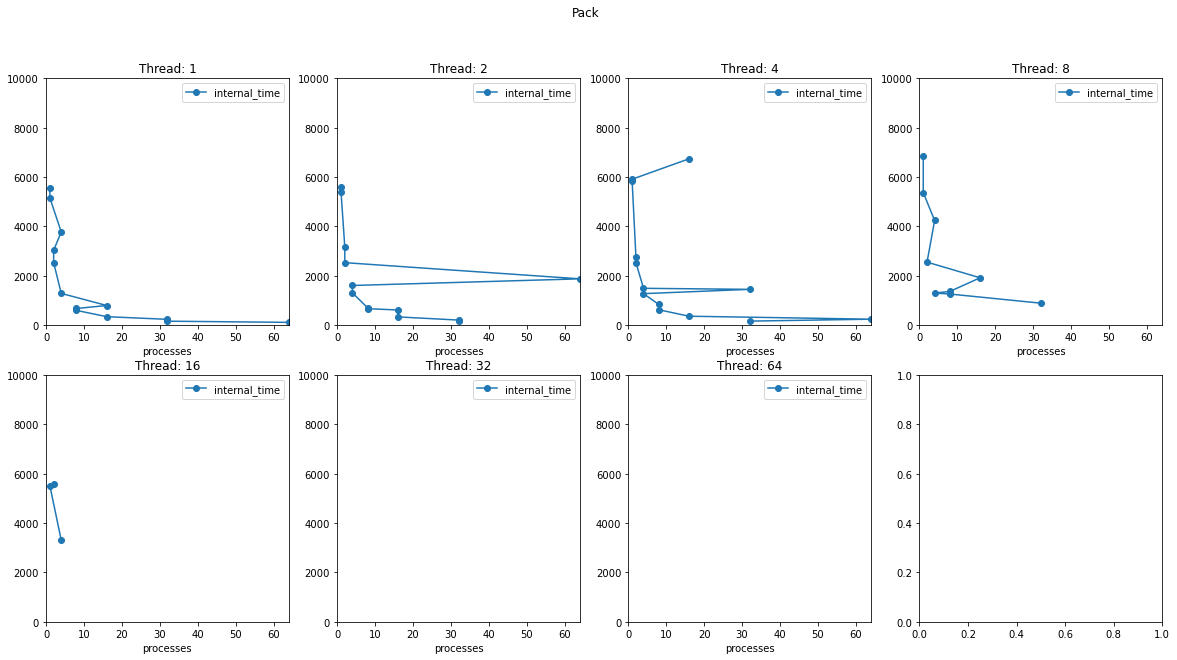

In [7]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
for i, t in zip(range(4), [1,2,4,8]):
    runs[(runs.place == 'pack') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[0, i])
    axs[0, i].set_title(f"Thread: {t}")
    axs[0, i].set_xlim([0, 64])
    axs[0, i].set_ylim([0, 10000])
    
for i, t in zip(range(3), [16, 32, 64]):
    runs[(runs.place == 'pack') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[1, i])
    axs[1, i].set_title(f"Thread: {t}")
    axs[1, i].set_xlim([0, 64])
    axs[1, i].set_ylim([0, 10000])

plt.suptitle('Pack')
plt.savefig('pack.png')
plt.show()

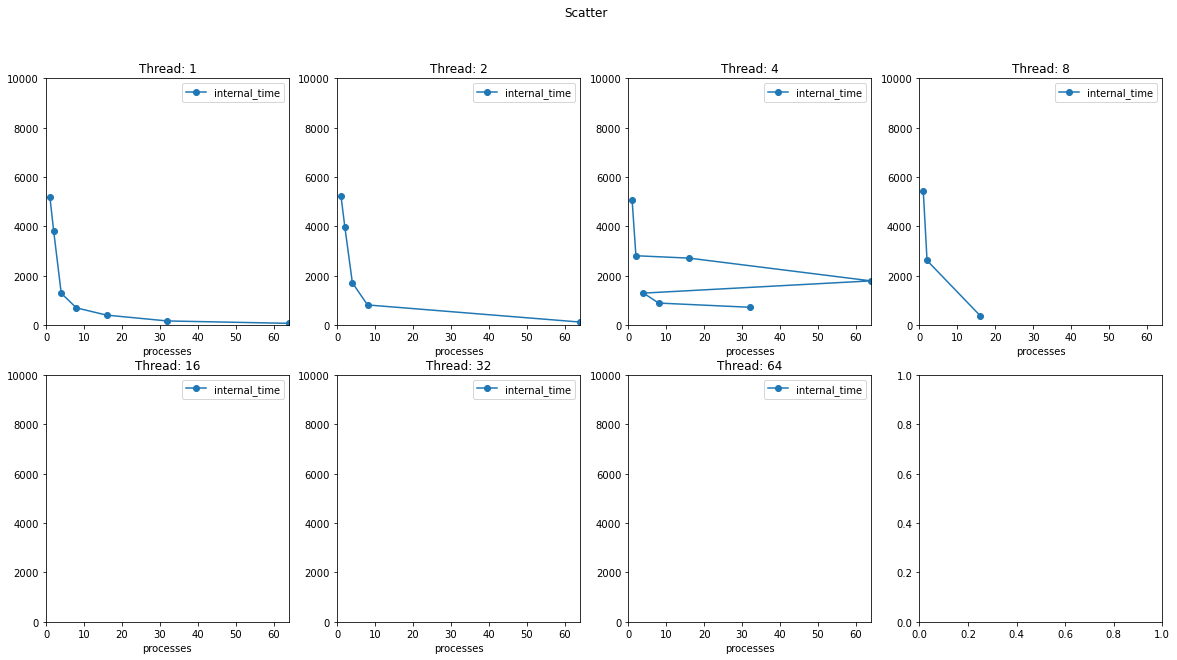

In [8]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
for i, t in zip(range(4), [1,2,4,8]):
    runs[(runs.place == 'scatter') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[0, i])
    axs[0, i].set_title(f"Thread: {t}")
    axs[0, i].set_xlim([0, 64])
    axs[0, i].set_ylim([0, 10000])
    
for i, t in zip(range(3), [16, 32, 64]):
    runs[(runs.place == 'scatter') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[1, i])
    axs[1, i].set_title(f"Thread: {t}")
    axs[1, i].set_xlim([0, 64])
    axs[1, i].set_ylim([0, 10000])

plt.suptitle('Scatter')
plt.savefig('scater.png')
plt.show()

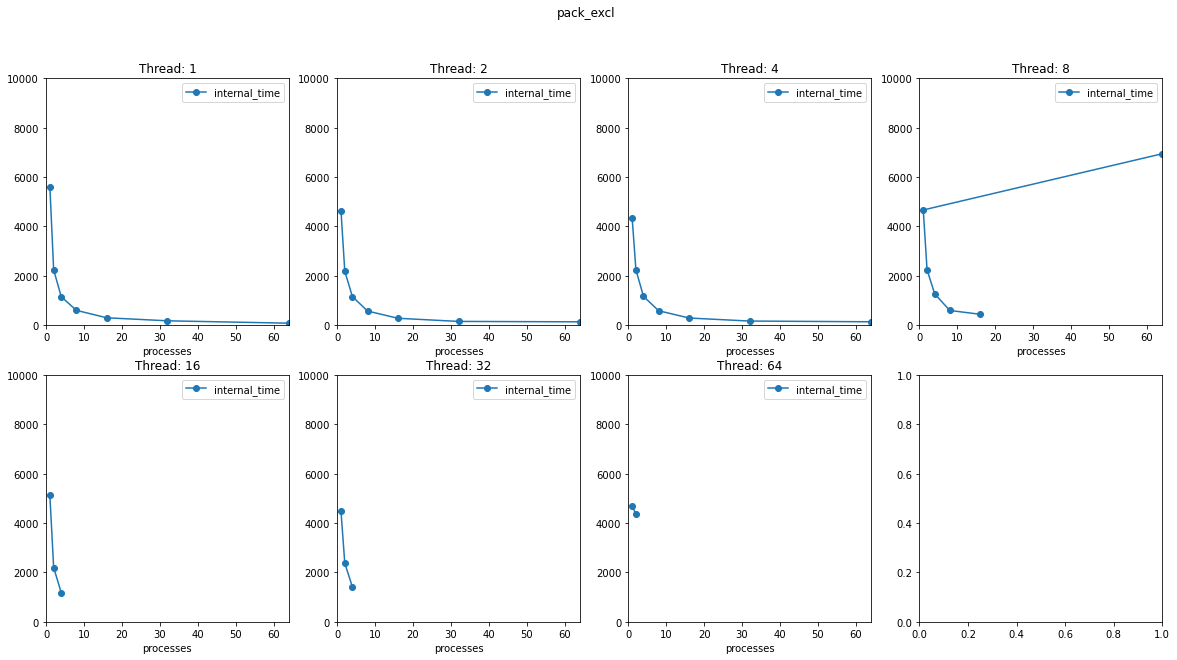

In [9]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
for i, t in zip(range(4), [1,2,4,8]):
    runs[(runs.place == 'pack_excl') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[0, i])
    axs[0, i].set_title(f"Thread: {t}")
    axs[0, i].set_xlim([0, 64])
    axs[0, i].set_ylim([0, 10000])
    
for i, t in zip(range(3), [16, 32, 64]):
    runs[(runs.place == 'pack_excl') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[1, i])
    axs[1, i].set_title(f"Thread: {t}")
    axs[1, i].set_xlim([0, 64])
    axs[1, i].set_ylim([0, 10000])

plt.suptitle('pack_excl')
plt.savefig('pack.png')
plt.show()

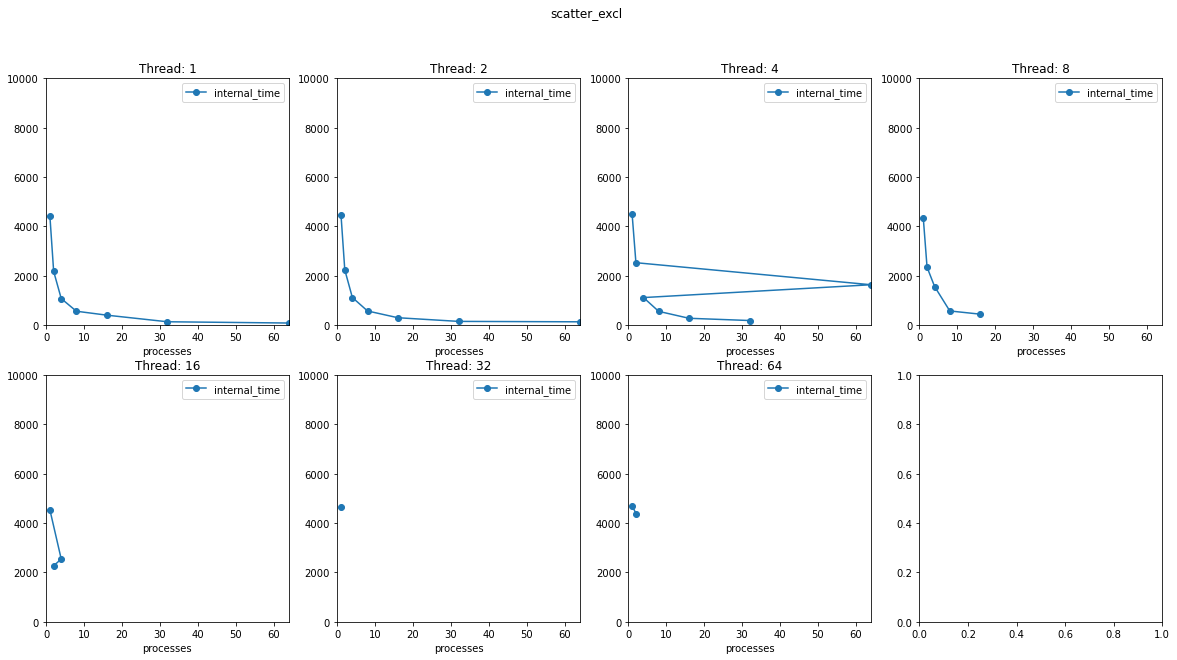

In [10]:
fig, axs = plt.subplots(2,4, figsize=(20, 10))
for i, t in zip(range(4), [1,2,4,8]):
    runs[(runs.place == 'scatter_excl') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[0, i])
    axs[0, i].set_title(f"Thread: {t}")
    axs[0, i].set_xlim([0, 64])
    axs[0, i].set_ylim([0, 10000])
    
for i, t in zip(range(3), [16, 32, 64]):
    runs[(runs.place == 'scatter_excl') & (runs.threads == t)].sort_values('internal_time').plot(x='processes', y='internal_time', marker='o', ax=axs[1, i])
    axs[1, i].set_title(f"Thread: {t}")
    axs[1, i].set_xlim([0, 64])
    axs[1, i].set_ylim([0, 10000])

plt.suptitle('scatter_excl')
plt.savefig('pack.png')
plt.show()